In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LinearRegression

path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'

In [3]:
df = pd.read_csv(path + '/30538.csv')
print(df)

                       x  major  minor  rssi  txpower  est_dist  \
0      c2:02:0b:00:05:4e  40001  30538   -70      -59      2.71   
1      c2:02:0b:00:05:4e  40001  30538   -67      -59      2.22   
2      c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
3      c2:02:0b:00:05:4e  40001  30538   -69      -59      2.54   
4      c2:02:0b:00:05:4e  40001  30538   -70      -59      2.71   
...                  ...    ...    ...   ...      ...       ...   
63432  c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
63433  c2:02:0b:00:05:4e  40001  30538   -71      -59      2.90   
63434  c2:02:0b:00:05:4e  40001  30538   -66      -59      2.08   
63435  c2:02:0b:00:05:4e  40001  30538   -78      -59      4.61   
63436  c2:02:0b:00:05:4e  40001  30538   -72      -59      3.09   

                   time  real_dist  
0      2021.11.16 14:20          2  
1      2021.11.16 14:20          2  
2      2021.11.16 14:20          2  
3      2021.11.16 14:20          2  
4      202

In [10]:

file_list = ['30528.csv', '30538.csv','30547.csv','30549.csv','30550.csv','30556.csv','30557.csv']  # 추가로 불러올 파일이 있다면, 이 리스트에 파일명을 추가해주세요.

df_list = []

for file in file_list:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    
    # 'rssi'와 'est_dist','real_dist' 컬럼만 추출
    df = df[['rssi', 'est_dist','real_dist']]
    df_list.append(df)

# 모든 데이터프레임을 하나로 합치기
final_df = pd.concat(df_list)

# 결과를 새 csv 파일에 저장
final_df.to_csv(os.path.join(path, 'final_output.csv'), index=False)




In [5]:
rssi_data = df[['rssi','est_dist']]
rssi_data.to_csv('rssi_data.csv', index=False)


In [24]:
#df1 = pd.read_csv(path + '/rssi_data.csv')
#print(df1)

       rssi
0       -64
1       -62
2       -65
3       -64
4       -66
...     ...
67646   -64
67647   -57
67648   -58
67649   -58
67650   -65

[67651 rows x 1 columns]


In [6]:
rssi_data_plt = pd.read_csv(path + '/final_output.csv')
print(rssi_data_plt)
rssi = rssi_data_plt['rssi']
est_dist  = rssi_data_plt['est_dist']


        rssi  est_dist
0        -64      1.82
1        -62      1.59
2        -65      1.94
3        -64      1.82
4        -66      2.08
...      ...       ...
418369   -76      4.04
418370   -75      3.78
418371   -86      7.84
418372   -75      3.78
418373   -84      6.87

[418374 rows x 2 columns]


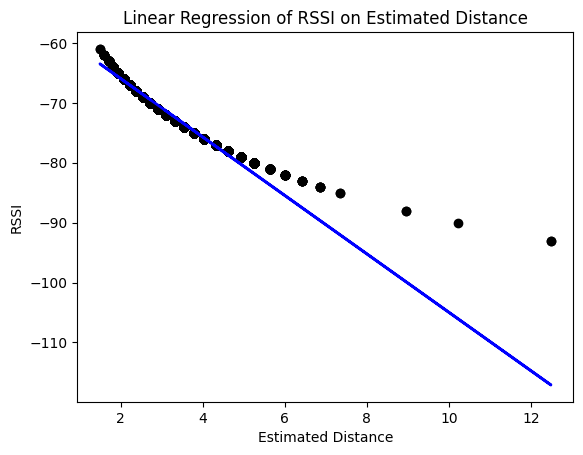

In [105]:
rssi_data = df[['rssi']]
est_distance = df[['est_dist']] 

# 선형 회귀 모델 생성 및 학습
model = LinearRegression().fit(est_distance,rssi_data)

# 회귀선을 위한 예측값 생성
rssi_pred = model.predict(est_distance)

# 원래 RSSI 데이터와 회귀선 그리기
plt.scatter(est_distance, rssi_data, color='black')
plt.plot(est_distance, rssi_pred, color='blue', linewidth=2)

# x축, y축 라벨 및 그래프 제목 설정
plt.xlabel('Estimated Distance')
plt.ylabel('RSSI')
plt.title('Linear Regression of RSSI on Estimated Distance')

plt.show()


Number of Preprocessed Data: 63437
Original RSSI Values: [-70 -67 -71 ... -66 -78 -72]
Filtered (and zero-padded) RSSI Values: [-63.63642149 -65.23821859 -67.09719527 ... -70.74104972 -70.81327718
 -70.82508522]


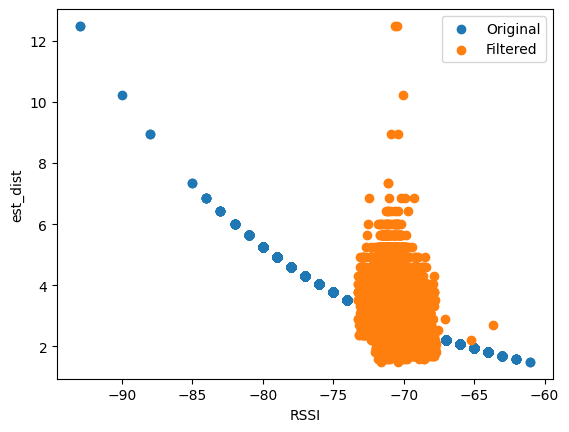

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class KalmanFilter():
    def __init__(self):
        self.Q = 1e-5  # Process noise covariance
        self.R = 0.1  # Measurement noise covariance
        self.x = 0  # Initial state (RSSI)
        self.P = 1  # Initial state covariance

    def filtering(self, measurement):
        # Prediction
        x_pred = self.x
        P_pred = self.P + self.Q

        # Update
        K = P_pred / (P_pred + self.R)
        self.x = x_pred + K * (measurement - x_pred)
        self.P = (1 - K) * P_pred

        return self.x
def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame
    df =  pd.read_csv(file_path + 'rssi_data.csv')

    # Extract the 'rssi' and 'est_dist' columns from the DataFrame
    rssi_data = df['rssi'].tolist()
    est_dist_data = df['est_dist'].tolist()

    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Print the number of preprocessed data
    print("Number of Preprocessed Data:", len(filtered_rssi))
    
    # Apply zero padding to the filtered data
    max_len = max(len(rssi_data), len(filtered_rssi))
    rssi_data = np.pad(rssi_data, (0, max_len - len(rssi_data)), 'constant')
    filtered_rssi = np.pad(filtered_rssi, (0, max_len - len(filtered_rssi)), 'constant')

    # Output results
    print("Original RSSI Values:", rssi_data)
    print("Filtered (and zero-padded) RSSI Values:", filtered_rssi)

    # Plotting the data
    plt.scatter(rssi_data, est_dist_data, label='Original')
    plt.scatter(filtered_rssi, est_dist_data, label='Filtered')
    plt.xlabel('RSSI')
    plt.ylabel('est_dist')
    plt.legend()
    plt.show()

# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)


